In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as  plt

In [2]:
housing=pd.read_csv('Housing.csv')
housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.mainroad = housing.mainroad.map(dict(yes=1,no=0))
housing.guestroom = housing.guestroom.map(dict(yes=1,no=0))
housing.basement = housing.basement.map(dict(yes=1,no=0))
housing.hotwaterheating = housing.hotwaterheating.map(dict(yes=1,no=0))
housing.airconditioning = housing.airconditioning.map(dict(yes=1,no=0))
housing.prefarea = housing.prefarea.map(dict(yes=1,no=0))

housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
housing.shape

(545, 13)

In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(housing, train_size=0.8, test_size=0.2)
df_train.shape

(436, 13)

In [6]:
df_test.shape

(109, 13)

In [7]:
num_vars=['area','bathrooms','bedrooms', 'stories','parking', 'price']
df_Newtrain=df_train[num_vars]
df_Newtest=df_test[num_vars]
df_Newtrain.head(5)

,area,bathrooms,bedrooms,stories,parking,price
542,3620,1,2,1,0,1750000
496,4000,1,2,1,0,2695000
484,3040,1,2,1,0,2870000
507,3600,1,2,1,0,2590000
252,9860,1,3,1,0,4515000


In [8]:
df_Newtrain.shape

(436, 6)

In [9]:
df_Newtest.shape

(109, 6)

In [10]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
df_Newtrain[num_vars]=scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(5)

<ipython-input-10-8411c2f314fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Newtrain[num_vars]=scaler.fit_transform(df_Newtrain[num_vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,area,bathrooms,bedrooms,stories,parking,price
542,0.124199,0.0,0.2,0.0,0.0,0.000000
496,0.150654,0.0,0.2,0.0,0.0,0.081818
484,0.083821,0.0,0.2,0.0,0.0,0.096970
507,0.122807,0.0,0.2,0.0,0.0,0.072727
252,0.558619,0.0,0.4,0.0,0.0,0.239394


In [11]:
dataset= df_Newtrain.values[:,:]
print('dataset=', dataset [:20,:])

dataset= [[0.12419939 0.         0.2        0.         0.         0.        ]
 [0.15065441 0.         0.2        0.         0.         0.08181818]
 [0.08382066 0.         0.2        0.         0.         0.0969697 ]
 [0.12280702 0.         0.2        0.         0.         0.07272727]
 [0.55861877 0.         0.4        0.         0.         0.23939394]
 [0.14842662 0.         0.4        0.33333333 0.         0.23030303]
 [0.13951546 0.         0.4        0.33333333 0.33333333 0.24545455]
 [0.55444166 0.5        0.6        0.33333333 0.66666667 0.3030303 ]
 [0.12559176 0.         0.2        0.         0.         0.15757576]
 [0.11723754 0.5        0.2        0.         0.         0.16363636]
 [0.79114453 0.         0.4        0.33333333 0.66666667 0.6969697 ]
 [0.06015038 0.         0.2        0.         0.         0.1030303 ]
 [0.17153996 0.5        1.         0.33333333 0.         0.37515152]
 [0.18546366 0.         0.2        0.         0.         0.13030303]
 [0.21992481 0.5        0

In [12]:
x1= df_Newtrain.values [:,0]
x2= df_Newtrain.values [:,1]
x3= df_Newtrain.values [:,2]
x4= df_Newtrain.values [:,3]
x5= df_Newtrain.values [:,4]
y= df_Newtrain.values[:,5]
m= len(y)
y


array([0.        , 0.08181818, 0.0969697 , 0.07272727, 0.23939394,
       0.23030303, 0.24545455, 0.3030303 , 0.15757576, 0.16363636,
       0.6969697 , 0.1030303 , 0.37515152, 0.13030303, 0.27212121,
       0.12121212, 0.10606061, 0.44848485, 0.15151515, 0.35757576,
       0.15151515, 0.21515152, 0.16969697, 0.2       , 0.05151515,
       0.24242424, 0.72727273, 0.16363636, 0.07878788, 0.04181818,
       0.03333333, 0.21878788, 0.38787879, 0.39393939, 0.18787879,
       0.48484848, 0.57575758, 0.3       , 0.49090909, 0.38787879,
       0.27272727, 0.24242424, 0.2       , 0.10909091, 0.48424242,
       0.33333333, 0.46666667, 0.72727273, 0.7030303 , 0.17575758,
       0.1030303 , 0.07818182, 0.18060606, 0.26060606, 0.53787879,
       0.12060606, 0.15151515, 0.25454545, 0.22424242, 0.23939394,
       0.00148485, 0.11515152, 0.36363636, 0.32727273, 0.12121212,
       0.47272727, 0.09090909, 0.11212121, 0.09393939, 0.00606061,
       0.14848485, 0.21212121, 0.28484848, 0.48484848, 0.30303

In [13]:
x_1=x1.reshape(m,1)
print('x_1=', x_1[:5,:])

x_1= [[0.12419939]
 [0.15065441]
 [0.08382066]
 [0.12280702]
 [0.55861877]]


In [14]:
x_2=x2.reshape(m,1)
x_3=x3.reshape(m,1)
x_4=x4.reshape(m,1)
x_5=x5.reshape(m,1)

In [15]:
x_0=np.ones((m,1))
x_0[:5], len(x_0)


(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 436)

In [16]:
x=np.hstack((x_0, x_1, x_2, x_3, x_4, x_5))
x[:5]

array([[1.        , 0.12419939, 0.        , 0.2       , 0.        ,
        0.        ],
       [1.        , 0.15065441, 0.        , 0.2       , 0.        ,
        0.        ],
       [1.        , 0.08382066, 0.        , 0.2       , 0.        ,
        0.        ],
       [1.        , 0.12280702, 0.        , 0.2       , 0.        ,
        0.        ],
       [1.        , 0.55861877, 0.        , 0.4       , 0.        ,
        0.        ]])

In [17]:
df_Newtest[num_vars]=scaler.fit_transform(df_Newtest[num_vars])
df_Newtest.head(5)


<ipython-input-17-76df33ce5514>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Newtest[num_vars]=scaler.fit_transform(df_Newtest[num_vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,area,bathrooms,bedrooms,stories,parking,price
239,0.203463,0.0,0.50,0.333333,0.333333,0.270000
113,0.690043,0.0,0.50,0.000000,0.666667,0.412667
325,0.156710,0.0,0.75,0.333333,0.000000,0.215000
66,1.000000,0.0,0.25,0.000000,0.333333,0.493333
479,0.174026,0.0,0.75,0.333333,0.000000,0.113333


In [18]:
dataset_test= df_Newtest.values[:,:]
print('dataset=', dataset_test[:20,:])

dataset= [[0.2034632  0.         0.5        0.33333333 0.33333333 0.27      ]
 [0.69004329 0.         0.5        0.         0.66666667 0.41266667]
 [0.15670996 0.         0.75       0.33333333 0.         0.215     ]
 [1.         0.         0.25       0.         0.33333333 0.49333333]
 [0.17402597 0.         0.75       0.33333333 0.         0.11333333]
 [0.40692641 0.33333333 0.5        0.66666667 0.         0.42333333]
 [0.19047619 0.         0.5        0.         0.66666667 0.17      ]
 [0.15844156 0.         0.5        0.33333333 0.33333333 0.11333333]
 [0.16121212 0.         0.25       0.         0.33333333 0.16666667]
 [0.63636364 0.33333333 0.75       1.         0.66666667 0.59333333]
 [0.37662338 0.33333333 0.75       1.         0.         0.47666667]
 [0.2        0.         0.5        0.33333333 0.         0.21333333]
 [0.15584416 0.         0.5        0.33333333 0.         0.13333333]
 [0.38181818 0.         0.5        0.         0.         0.14666667]
 [0.37532468 0.         0

In [19]:
x1t= df_Newtest.values [:,0]
x2t= df_Newtest.values [:,1]
x3t= df_Newtest.values [:,2]
x4t= df_Newtest.values [:,3]
x5t= df_Newtest.values [:,4]
yt= df_Newtest.values[:,5]
n= len(yt)
x1t

array([0.2034632 , 0.69004329, 0.15670996, 1.        , 0.17402597,
       0.40692641, 0.19047619, 0.15844156, 0.16121212, 0.63636364,
       0.37662338, 0.2       , 0.15584416, 0.38181818, 0.37532468,
       0.06753247, 0.28138528, 0.37835498, 0.12554113, 0.24675325,
       0.56277056, 0.41558442, 0.29004329, 0.004329  , 0.41298701,
       0.12987013, 0.46320346, 0.34891775, 0.14285714, 0.41298701,
       0.23809524, 0.05411255, 0.58441558, 0.20692641, 0.12727273,
       0.41471861, 0.37662338, 0.12      , 0.15584416, 0.04545455,
       0.59307359, 0.36796537, 0.35930736, 0.33290043, 0.16190476,
       0.37662338, 0.21731602, 0.20692641, 0.20744589, 0.35064935,
       0.27619048, 0.69411255, 0.        , 0.19047619, 0.36623377,
       0.35238095, 0.57142857, 0.25887446, 0.16883117, 0.46320346,
       0.97402597, 0.42857143, 0.04199134, 0.37662338, 0.08571429,
       0.10103896, 0.47662338, 0.23896104, 0.24675325, 0.4025974 ,
       0.04285714, 0.33333333, 0.16883117, 0.22597403, 0.18441

In [20]:
yt

array([0.27      , 0.41266667, 0.215     , 0.49333333, 0.11333333,
       0.42333333, 0.17      , 0.11333333, 0.16666667, 0.59333333,
       0.47666667, 0.21333333, 0.13333333, 0.14666667, 0.22666667,
       0.08666667, 0.25333333, 0.18666667, 0.15333333, 0.24      ,
       0.31      , 0.346     , 0.44666667, 0.01333333, 0.41666667,
       0.35333333, 0.386     , 0.27333333, 0.36      , 0.4       ,
       0.24333333, 0.18      , 0.33333333, 0.15      , 0.186     ,
       0.286     , 0.7       , 0.16666667, 0.13333333, 0.24      ,
       0.68666667, 0.22      , 0.38      , 0.13133333, 0.17933333,
       0.55333333, 0.27333333, 0.14666667, 0.23      , 0.46666667,
       0.23      , 0.28      , 0.13333333, 0.2       , 0.14666667,
       0.31666667, 0.45333333, 0.38      , 0.19333333, 0.29      ,
       0.3       , 0.35333333, 0.16666667, 0.55      , 0.10333333,
       0.35666667, 0.66      , 0.23333333, 0.23333333, 0.3       ,
       0.15066667, 0.42333333, 0.22366667, 0.46666667, 0.20333

In [21]:
x_1t=x1t.reshape(n,1)
x_2t=x2t.reshape(n,1)
x_3t=x3t.reshape(n,1)
x_4t=x4t.reshape(n,1)
x_5t=x5t.reshape(n,1)
x_0t=np.ones((n,1))
x_0t[:5], len(x_0)


(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 436)

In [22]:
xt=np.hstack((x_0t, x_1t, x_2t, x_3t, x_4t, x_5t))
xt[:5]

array([[1.        , 0.2034632 , 0.        , 0.5       , 0.33333333,
        0.33333333],
       [1.        , 0.69004329, 0.        , 0.5       , 0.        ,
        0.66666667],
       [1.        , 0.15670996, 0.        , 0.75      , 0.33333333,
        0.        ],
       [1.        , 1.        , 0.        , 0.25      , 0.        ,
        0.33333333],
       [1.        , 0.17402597, 0.        , 0.75      , 0.33333333,
        0.        ]])

In [23]:
theta=np.zeros((6,1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [24]:
def compute_loss(x,y, theta):
    
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J= 1 / (2 * m) * np.sum(sqrErrors) 
    
    return J

In [25]:
cost = compute_loss(x, y, theta)
print('The cost for given values of theta_0,_1,_2,_3, ..., -6 is:', cost)

The cost for given values of theta_0,_1,_2,_3, ..., -6 is: 20.934727519081726


In [26]:
def gradient_descent(x, y, theta, alpha, iterations,xt,yt):
    
    loss_history= np.zeros(iterations)
    t_loss_history= np.zeros(iterations)  
    
    for i in range(iterations):
        predictions= x.dot(theta)
        errors=np.subtract(predictions, y)
        sum_delta=(alpha/ m)* x.transpose().dot(errors)
        theta= theta - sum_delta
        loss_history[i]= compute_loss(x,y,theta)
        t_loss_history[i]=compute_loss(xt,yt,theta)
        
        
    return theta, loss_history,t_loss_history

In [27]:
theta=[0,0,0,0,0,0]
iterations=5000;
alpha=0.01;

In [28]:
theta, loss_history,t_loss_history = gradient_descent(x,y, theta, alpha, iterations,xt,yt)
print('Final value of theta=', theta)
print('loss_history=', loss_history)
print('validation_loss_history=', t_loss_history)

Final value of theta= [0.06201977 0.28374771 0.20680751 0.10037865 0.14105219 0.11979515]
loss_history= [0.04697501 0.04596297 0.04497855 ... 0.00630829 0.00630821 0.00630813]
validation_loss_history= [0.01300141 0.01272153 0.01244911 ... 0.00129497 0.00129496 0.00129495]


Text(0.5, 1.0, 'Convergence of gradient descent')

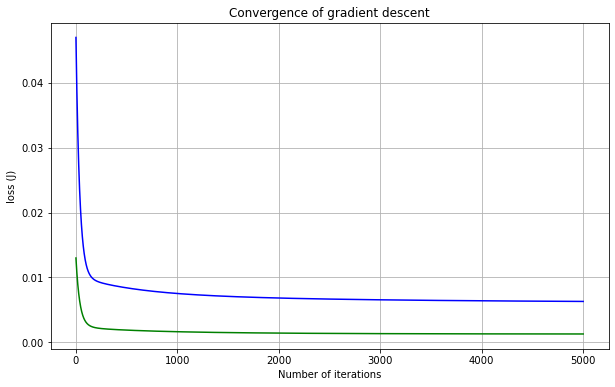

In [30]:
plt.plot(range(1, iterations +1), loss_history, color='blue')
plt.plot(range(1, iterations +1), t_loss_history, color='green')
plt.rcParams["figure.figsize"]= (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('loss (J)')
plt.title('Convergence of gradient descent')